In [10]:
import os

password = os.environ["password"]

In [11]:
SHOW COLUMNS FROM pet_sales

,Field,Type,Null,Key,Default,Extra
0,product_id,int(4),YES,MUL,NaN,NaN
1,product_category,varchar(11),YES,,NaN,NaN
2,price,"decimal(5,2)",YES,,NaN,NaN
3,vendor_id,varchar(7),YES,,NaN,NaN
4,pet_size,varchar(11),YES,,NaN,NaN
5,pet_type,varchar(7),YES,,NaN,NaN
6,rating,int(2),YES,,NaN,NaN
7,re_buy,int(1),YES,,NaN,NaN
8,sales_num,int(10),YES,,NaN,NaN


In order to change the data type of the "sales" column, first the comma and the dollar sign had to be removed so it could be possible to change the data type with the foolowing code
` UPDATE pet_sales
SET replace(replace(sales, ',', ''), '$', '');`
After this, the column could be casted to change the data type.
All this were done in the mysql host managment system. 

Here, we can see that the data types of the columns were set accordingly to the project brief

In [12]:
select * from pet_sales

,product_id,product_category,price,vendor_id,pet_size,pet_type,rating,re_buy,sales_num
0,5040.0,Equipment,94.81,VC_1605,small,fish,7.0,1.0,123000.0
1,4567.0,Toys,120.95,VC_1132,small,cat,10.0,0.0,61000.0
2,4237.0,Toys,106.34,VC_802,small,hamster,6.0,0.0,218000.0
3,4364.0,Snack,241.27,VC_929,large,dog,1.0,1.0,69000.0
4,4184.0,Supplements,133.68,VC_749,large,dog,10.0,0.0,138000.0
...,...,...,...,...,...,...,...,...,...
14059,NaN,None,NaN,None,None,None,NaN,NaN,NaN
14060,NaN,None,NaN,None,None,None,NaN,NaN,NaN
14061,NaN,None,NaN,None,None,None,NaN,NaN,NaN
14062,NaN,None,NaN,None,None,None,NaN,NaN,NaN


In [13]:
SELECT count(distinct(product_id)) 
FROM pet_sales
where re_buy= 1;

,count(distinct(product_id))
0,410


The sum of total unique products that were purchased more than once is 410 out of the 879

In [14]:
SELECT  ( Select SUM(sales_num) from pet_sales where re_buy= 1) as total_rebuyed,
	 ( Select SUM(sales_num) from pet_sales where re_buy= 0) as total_non_rebuyed
FROM pet_sales
group by total_rebuyed, total_non_rebuyed;

,total_rebuyed,total_non_rebuyed
0,47776000,54271000


As seen, the sum of the total of the sales of the products that were rebuyed is 47,776,000, compared to the total sum of the products that were not rebuyed is 54,271,000. So, the total of the non rebuyed products is grater that the rebuyed ones by 6,495,000, in wich case we can conclude that the products that were not rebuyed have better sales.

In [15]:
SELECT pet_type, product_category, sum(sales_num) as total_sales, ((sales_num)/(price)) as products_buyed , re_buy
FROM pet_sales
where re_buy= 1
group by pet_type
order by products_buyed desc;


,pet_type,product_category,total_sales,products_buyed,re_buy
0,fish,Equipment,3423000,1297.3315,1
1,cat,Supplements,19192000,1083.9161,1
2,bird,Equipment,3385000,697.2596,1
3,rabbit,Clothes,1607000,483.3938,1
4,dog,Snack,19587000,285.9867,1
5,hamster,Supplements,582000,219.1829,1


Here, in order to get how many products were bought, the sales quantity was divided by the price of the product. 

NameError: name 'df' is not defined

This graph show the quantity of prodcuts that were sold grouped by the pet type where the products were rebuyed. This tells that the products of fish and cat were the ones that sold more products, independetly of its price. These categories are the ones that are more likely to be rebuy. 

In [17]:
SELECT pet_type, product_category, sum(sales_num) as total_sales, ((sales_num)/(price)) as products_buyed , re_buy
FROM pet_sales
group by pet_type, re_buy
order by products_buyed desc, re_buy;

,pet_type,product_category,total_sales,products_buyed,re_buy
0,hamster,Toys,1663000.0,2050.0282,0.0
1,fish,Equipment,3423000.0,1297.3315,1.0
2,rabbit,Housing,1483000.0,1101.2375,0.0
3,cat,Supplements,19192000.0,1083.9161,1.0
4,dog,Supplements,20112000.0,1032.3160,0.0
5,bird,Equipment,3385000.0,697.2596,1.0
6,bird,Equipment,4861000.0,539.0836,0.0
7,cat,Toys,21037000.0,504.3406,0.0
8,rabbit,Clothes,1607000.0,483.3938,1.0
9,fish,Toys,5115000.0,301.8903,0.0


NameError: name 'df' is not defined

Here, we can see the difference of quantity of products that were sold, grouped by pet type, that were rebuydes and those that were not rebuyed. We can compare these two graphs and get conclutions out of them. For examples, the units of products that were sold more are of hamsters, but must of them were not rebuyed. 

In [36]:
import pandas as pd 

df= pd.read_csv("https://s3.amazonaws.com/talent-assets.datacamp.com/pet_sales.csv")

df.head()

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,"$123,000",94.81,VC_1605,small,fish,7,1
1,4567,Toys,"$61,000",120.95,VC_1132,small,cat,10,0
2,4237,Toys,"$218,000",106.34,VC_802,small,hamster,6,0
3,4364,Snack,"$69,000",241.27,VC_929,large,dog,1,1
4,4184,Supplements,"$138,000",133.68,VC_749,large,dog,10,0


In [37]:
df['sales']= df['sales'].str.replace('$','')
df['sales']= df['sales'].str.replace(',','')
df['sales']= pd.to_numeric(df['sales'])
df['sales']

0      123000
1       61000
2      218000
3       69000
4      138000
        ...  
874     27000
875     76000
876    162000
877     34000
878     54000
Name: sales, Length: 879, dtype: int64

In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
items_sales= ((df['sales'])//(df['price']))
items_sales

0      1297.0
1       504.0
2      2050.0
3       285.0
4      1032.0
        ...  
874     183.0
875     436.0
876     722.0
877     170.0
878     314.0
Length: 879, dtype: float64

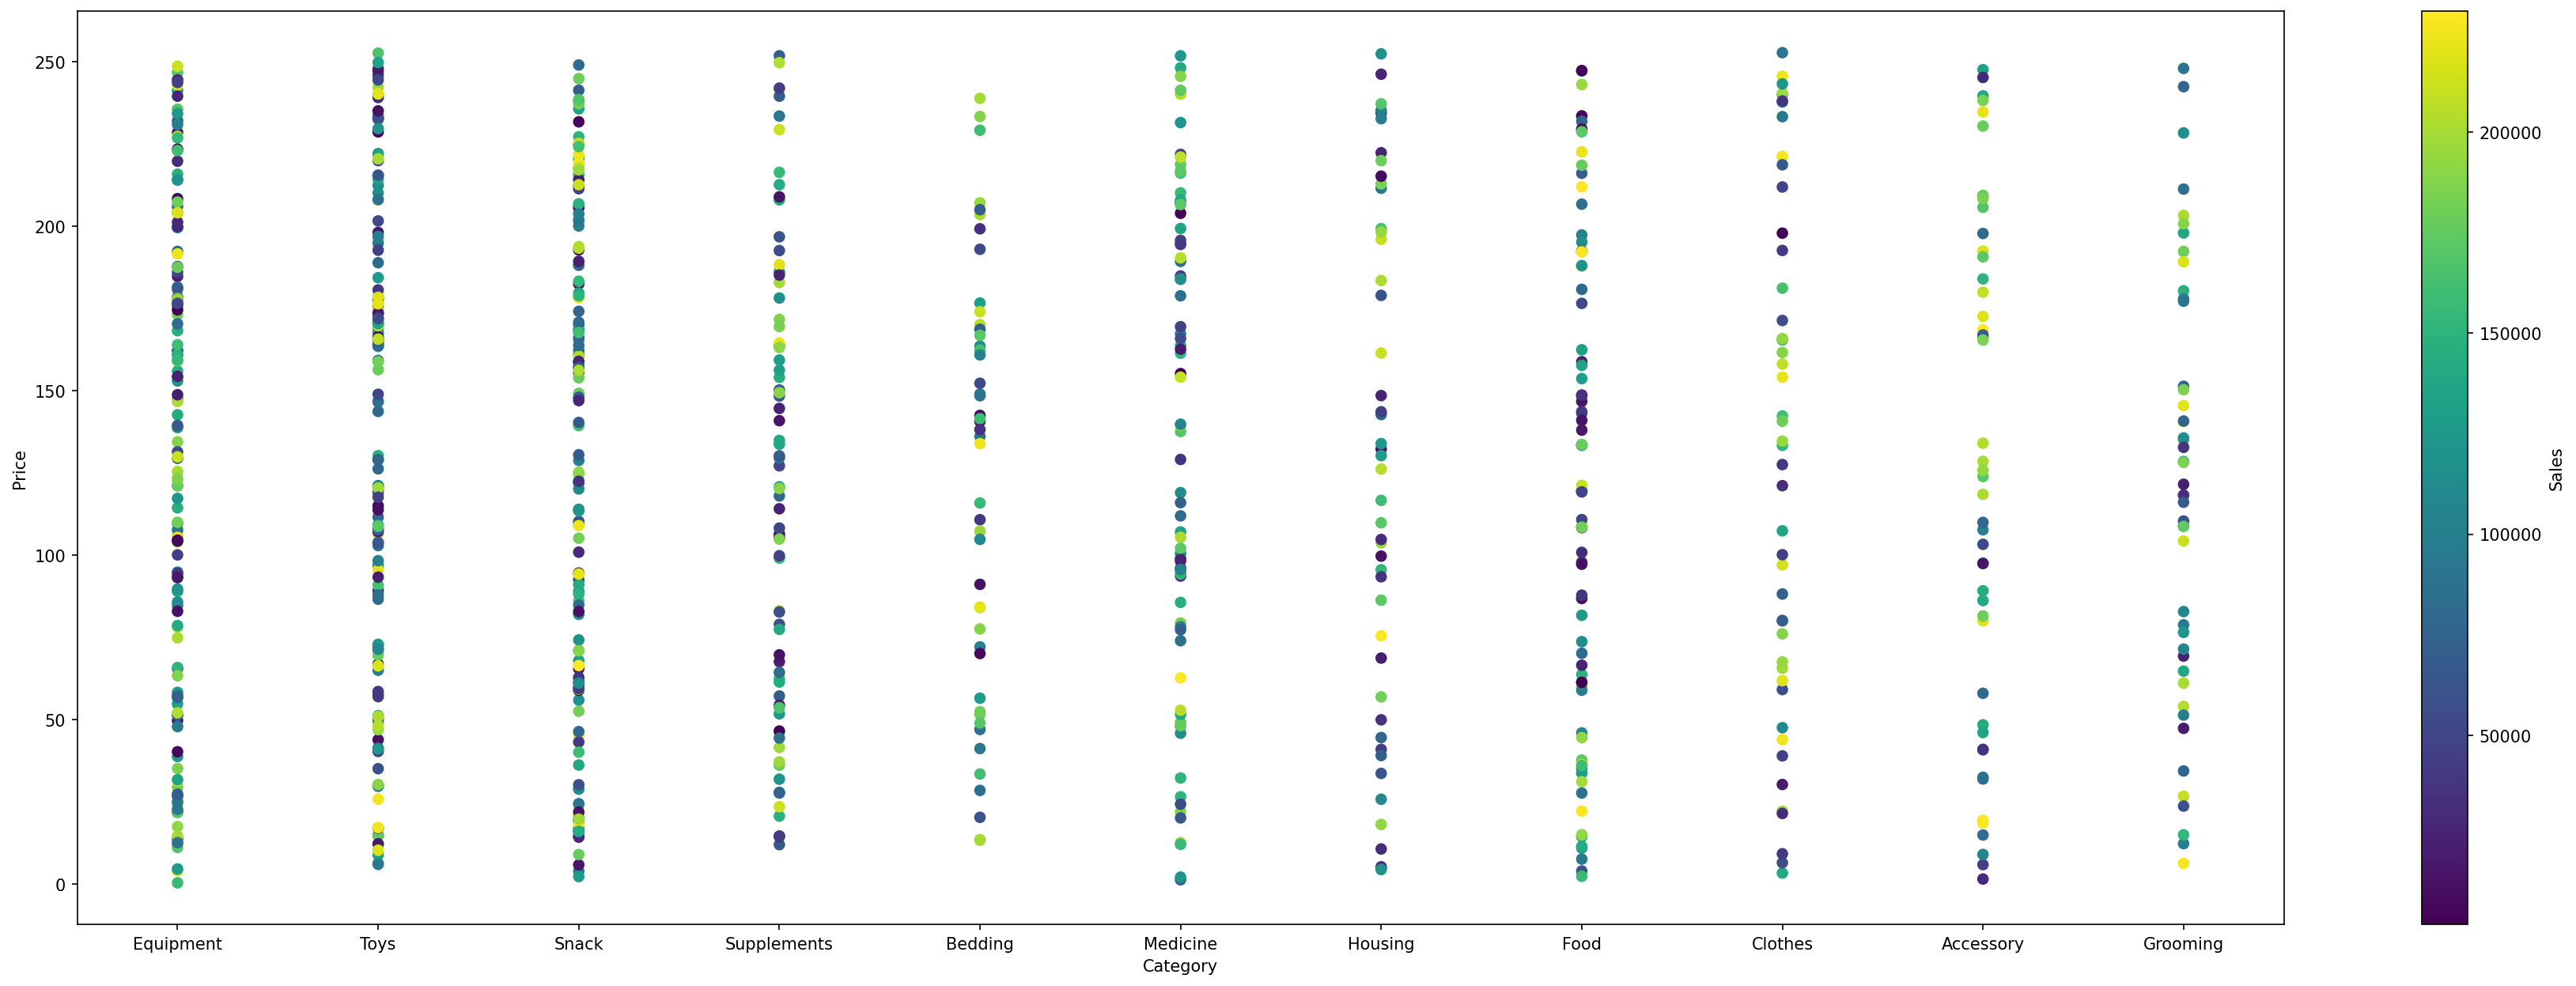

In [41]:
X= df['product_category']
Y= df['price']
items_sales= ((df['sales'])//(df['price']))
    
   

plt.scatter(X,Y , c=df['sales'] )
plt.rcParams.update({'figure.figsize': (10,30), 'figure.dpi':150})
plt.colorbar(label= 'Sales')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

In this boxblot, we can see the products grouped by its category, plotted vertically according to its price. So, we can see that for some kinds of products, there are items more expensive than others. One example is the bedding category, wich the mayority of products were in the range of 150 and 200, with only few items closer to the 250 and lower than 50. On the other hand, we see that products under the category of equipement and snacks, the prices are consistent along the full price range. Another element visible in the chart is the total sales of each category, having the products that made more money, independetly of the individual price, collored with lighter tones. With this, we can see that, for example, toys under 50 had great performance of sales, even the low cost. 

The boxplot was only possible with python matplotlib. To be able to do this, the pandas library was imported in order to read the csv file, store it in a Data Frame, and perform the data wrangling necessary, such as the sales column, wich was as string and was converted into a numeric, in order to get the insighst, such as the items bought, wich was obteined dividing the sales quantity by its price. 

In [33]:
SELECT  product_category, sales_num
FROM pet_sales
group by product_category
order by sales_num desc;

,product_category,sales_num
0,Accessory,204000.0
1,Food,192000.0
2,Bedding,183000.0
3,Medicine,141000.0
4,Supplements,138000.0
5,Equipment,123000.0
6,Housing,93000.0
7,Clothes,93000.0
8,Snack,69000.0
9,Toys,61000.0


NameError: name 'df' is not defined

One last insight that can be obtained is the total sales by product category in a line chart. This shows the product category that made more money, independetly of the price and the items sold. We can see that the leading category is the accesory, followed by the food category. This can lead to more advirtising in this category products in order to mantain and increase its numbers.